## Hey Kaggle!

This is my first competition so any comments or advice would help me a lot!
If you find this kernel useful, please upvote, and if you have any suggestion or if anything is not clear please comment, I will try to explain my work.

### This is an Explanatory Data Analysis for the Mercari Price Suggestion Challenge.

The competition is hosted by Mercari, the biggest Japanese community-powered shopping app.
Main goal of this kernel is to better understand of what this dataset is made of and to explore the relations between variables.

In [2]:
#imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline 
import seaborn as sns
sns.set(style="white")
import squarify 

from collections import Counter
from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.preprocessing import LabelEncoder




In [3]:
#reading data
train = pd.read_csv('train.tsv', sep = '\t')

Let's check some general informations about our dataset:


In [3]:
print(train.head())
train.info()

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

There are 7 columns in this data (besides the unique identifier (train_id) and we can see that there are some NaN values. Let's count them.

In [4]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

### Should we care about brand name?
Has brand name or not

What's the percentage of the product have brand name? 


In [7]:
with_brand = train.brand_name.dropna()

print('{0:.2f} percent of the product have brand name'.format(100 * len(with_brand) / len(train)))


57.32 percent of the product have brand name



Since we will not be preparing our data for machine learning we don't need to handle missing data, but brand cloud looks much better without NaN values.


(-0.5, 1439.5, 1079.5, -0.5)

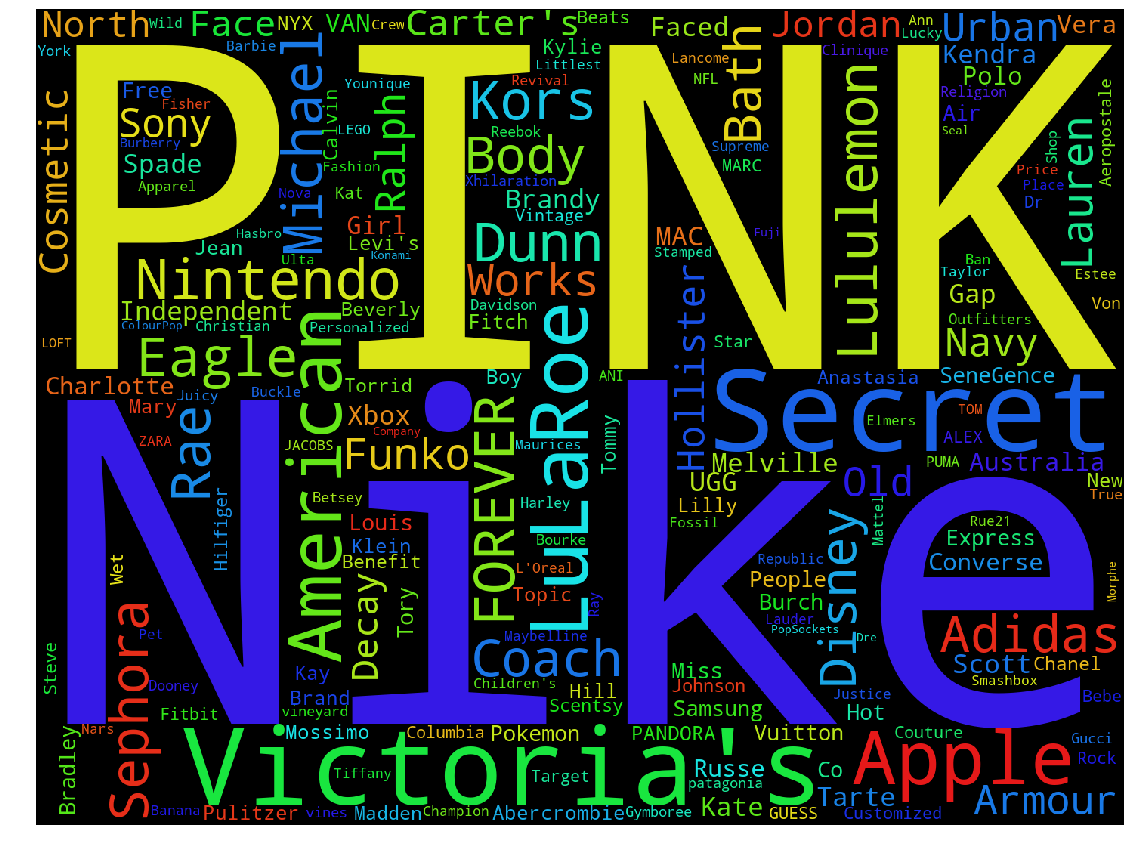

In [6]:
# Brand Cloud

brand_cloud = WordCloud(width=1440, height=1080).generate(" ".join(with_brand.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(brand_cloud)
plt.axis('off')

In [4]:
def countplot(x, data, figsize=(10,5)):
    """
    Wraps the countplot function of seaborn and allow to specify the size of the figure.
    """ 
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.countplot(x=x, data=data, ax=ax, order=data[x].value_counts().index)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
          
def subplots(x, y, z, data, hue=None, showfliers=False, figsize=(16,5)):
    """
    Boxplots and barplot. Wraps seabon's boxplot and barplot methods.
    """ 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    sns.barplot(x=x, y=y, data=data, order=data[x].value_counts().index, hue=hue, ax=ax1)
    sns.boxplot(x=x, y=y, data=data, order=data[x].value_counts().index, hue=hue, ax=ax2, showfliers=showfliers)
    for tick1, tick2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
        tick1.set_rotation(90)
        tick2.set_rotation(90)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)    
    sns.barplot(x=x, y=z, data=data, order=data[x].value_counts().index, hue=hue, ax=ax1)
    sns.boxplot(x=x, y=z, data=data, order=data[x].value_counts().index, hue=hue, ax=ax2, showfliers=showfliers)
    for tick1, tick2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
        tick1.set_rotation(90)
        tick2.set_rotation(90)

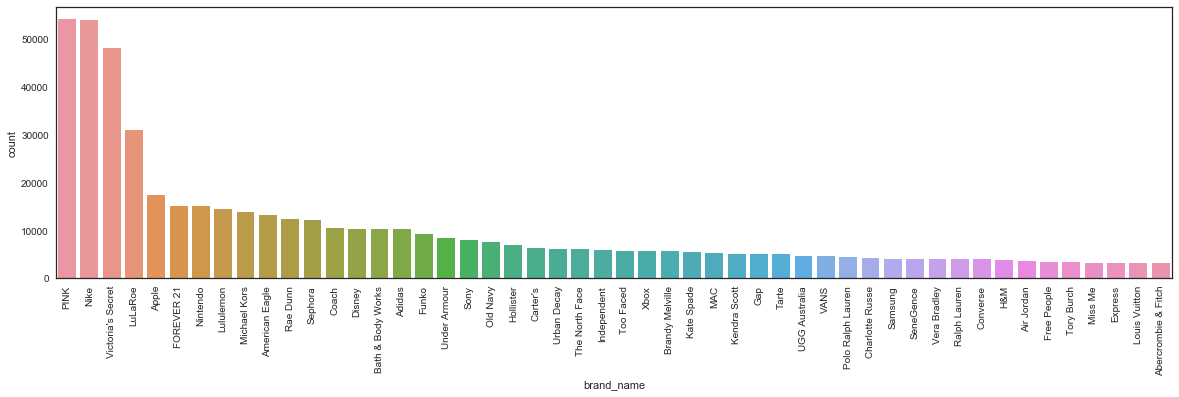

In [8]:
values = train['brand_name'].value_counts()
countplot('brand_name', train[train['brand_name'].isin(values.index[0:50])] , figsize=(20,5))



For my personal feeling brand name is important. But it's not true here. Since this challenge is about guessing the price, we have to check if the brand name has something in common with the price.


In [ ]:

b = str(round(train['no_brand'].value_counts(normalize=True).iloc[1] * 100,2)) + '%'
print(b, 'of items don\'t have brand. \n')

b1 = str(round((train.no_brand[train.price > 100].sum() / len(train.no_brand))*100,2)) + '%'
b2 = str(round((train.no_brand[train.price <= 100].sum() / len(train.no_brand))*100,2)) + '%'

print('Only', b1, 'of the items with price higher than 100$ don\'t have description, \n' 'remaining', b2,'are items with prices lower than 100$')



Most items have a brand name. Those without brand names tend to have slightly lower prices.

Another thing is if I see a given brand, I simultaneously identify the item condition to brand name. 
Should we check how it has a brand to item condition, it must be good, I require good quality, but I also know that the price will be higher, but it can not always be that way

NameError: name 'with_brands' is not defined

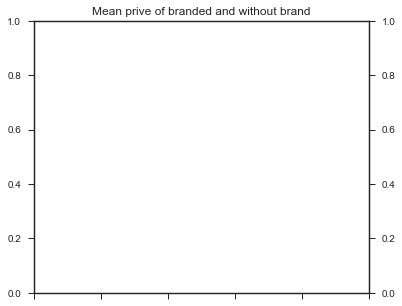

In [9]:
# item condition vs mean price
train["with_brands"] = train["brand_name"].dropna(how='all')
fig, ax = plt.subplots(figsize=(6, 5))
plt.title('Mean prive of branded and without brand')
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style("ticks")
ax2 = ax.twinx() #This allows the common axes to be shared
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
sns.countplot(x="branded",  data=with_brands,  ax=ax, palette="Set1")
#ax.set_ylim(0,50000)
sns.set_style("dark")
sns.factorplot(x="branded", y="price", data=train,  ax=ax2, scale = 0.7,color='black')
ax2.set_ylim(0,40)
sns.despine(ax=ax)
plt.close(2)
plt.show()


## porownajmy teraz brand name do item description


### jakie sa najczesciej uzywane slowa w item description?



In [ ]:
#most frequent word in name and item description 

cloud = WordCloud(width=1440, height=1080).generate(" ".join(train['name'].astype(str) + " " + train['item_description'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
categories = train['item_description'].apply(lambda x: str(x).lower()).value_counts()
categories[0:50]

### czy brand name i item description maja ze soba cos wspolnego?

In [ ]:

train['no_descrip'] = 0
train.loc[train.item_description=='No description yet', 'no_descrip'] = 1
i = str(round(train['no_descrip'].value_counts(normalize=True).iloc[1] * 100,2)) + '%'
print(i, 'of items don\'t have description. \n')

i1 = str(round((train.no_descrip[train.price > 100].sum() / len(train.no_descrip))*100,2)) + '%'
i2 = str(round((train.no_descrip[train.price <= 100].sum() / len(train.no_descrip))*100,2)) + '%'

print('Only', i1, 'of the items with price higher than 100$ don\'t have description, \n' 'remaining', i2,'are items with prices lower than 100$')



Text exploration

Lets take a look into our textual features. I bet we can have a lot of insights from it.



Explore products without description does not look to be the best initial approach in this competition.


In [ ]:
def countplot(x, data, figsize=(10,5)):
    """
    Wraps the countplot function of seaborn and allow to specify the size of the figure.
    """ 
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.countplot(x=x, data=data, ax=ax, order=data[x].value_counts().index)
    for tick in ax.get_xticklabels():
        tick.set_rotation(60)


musimy znalezc jakie slowo najczesciej wystepuje w itemach powyzej 100%

In [ ]:
# most expensive brand

def mean_price(groupby='category_sub1', cnt=20, top=True):
    df = train.groupby([groupby])['price'].agg(['size','sum'])
    df['mean_price']=df['sum']/df['size']
    df.sort_values(by=['mean_price'], ascending=(not top), inplace=True)
    df = df[:cnt]
    df.sort_values(by=['mean_price'], ascending=top, inplace=True)
    return df

def price_barh(df, title, ylabel):
    plt.figure(figsize=(20, 15))
    plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
    plt.yticks(range(0,len(df)), df.index, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(title, fontsize=15)
    plt.xlabel('Price', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
brands = train['brand_name'].unique()
print('There are totaly %d brand names' % len(brands))

df = mean_price(groupby='brand_name', cnt=50, top=True)
price_barh(df, 'Most expensive product', 'brand')

# czy brand name ma cos wspolnego z item condition

# Item description


Data Clearning
Analysis on item_description

Looking at the first row, it doesn't make sense to count "No description yet" as a description, so let's replace it with null values. Could there be any other non descriptive values? Let's check.

It looks like there is potential for generic seller descriptions, given the 234 occurances for the entry: "⚠️PLEASE READ⚠️ ‼️Orders will be shipped next day ‼️Delivery takes 3 to 5 business days ‼️Price is Firm •100% UV Protection (UVA and UVB) •Clear Lens Glasses •For fashion use •NON-RX (non-prescription) •Great for daily use!"

Not sure how to utilize that information, but it's good to know!


In [ ]:
# Description length vs price

train['coms_length'] = train['item_description'].str.len()

# Some descriptive statistics
pd.options.display.float_format = '{:.2f}'.format
train['coms_length'].describe()

#Is there a correlation between description length and price ?

plt.figure(figsize=(20,20))
sns.regplot(x ='coms_length',y='price', data = train, scatter_kws={'s':2})
plt.title ('Description length VS price', fontsize = 20)
plt.xlabel('Description length', fontsize = 20)
plt.ylabel('Price', fontsize = 20)




If we look at the most common words by category, we could also see that, size, free and shipping is very commonly used by the sellers, probably with the intention to attract customers, which is contradictory to what we have shown previously that there is little correlation between the two variables price and shipping (or shipping fees do not account for a differentiation in prices). Brand names also played quite an important role - it's one of the most popular in all four categories.



Has description or not

We learn from word cloud that, the "description yet" is a significant keyword. Does it has description or not will affect the price distribution?


# Category name

In [ ]:


cat = train.category_name.value_counts().size
print ('We have', cat, 'different items categories.')



There are about 1,287 unique categories but among each of them, we will always see a main/general category firstly, followed by two more particular subcategories (e.g. Beauty/Makeup/Face or Lips). In adidition, there are about 6,327 items that do not have a category labels. Let's split the categories into three different columns. We will see later that this information is actually quite important from the seller's point of view and how we handle the missing information in the brand_name column will impact the model's prediction.

In [ ]:
train['category_name'].value_counts()

In [ ]:
train['cat1'] = train.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
train['cat2'] = train.category_name.str.extract('([^/]+/[^/]+)/[^/]+')

plt.figure(figsize = (10,12))
train.name.groupby(train.cat1).count().plot(kind = 'pie')
plt.title ('First levels of categories', fontsize = 20)
plt.axis('equal')
plt.ylabel('')



We should take category as input features, since it's highly related to it's price.




train.groupby(["main"])["main"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)



In [ ]:
import time
import seaborn as sns
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")
train["general_cat"], train["sub_cat1"], train["sub_cat2"] = \
    zip(*train['category_name'].apply(lambda x: split_cat(x)))
train.drop("category_name", axis=1)
start_time = time.time()
plt.figure(figsize=(16, 8))
ax = sns.violinplot(x="general_cat", y="price", data=train, inner=None)
ax = sns.swarmplot(x="general_cat", y="price", data=train, edgecolor="gray", hue="sub_cat1")
plt.xticks(rotation=30)
plt.ylim(0, 200)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.show()
print('Showing graph took {} secs.'.format(time.time() - start_time))

zero = train.loc[train["price"]==0,]
print("Number of $0 listings = " + str(len(zero)))
print("Number of brands with $0 listings = " + str(sum(zero["no_brand_name"])))

In [ ]:


train['category_name'].str.contains('/').fillna(False).value_counts()

"""
The number of listing without slash in their category is the same as the number of missing value. We can deduce that there is always a slash when the category is present i.e. "/" is the delimiter used to separate the sub-categories.
"""

# Price


The next standard check is with our response or target variables, which in this case is the price we are suggesting to the Mercari's marketplace sellers. The median price of all the items in the training is about \$267 but given the existence of some extreme values of over \$100 and the maximum at \$2,009, the distribution of the variables is heavily skewed to the left. So let's make log-transformation on the price (we added +1 to the value before the transformation to avoid zero and negative values).


In [ ]:
#What's the price distribution of product with/without brand name?

# train['without_brand'] = 0
# train["with_brand"] = 1
print(train["without_brands"])
b = str(round(train['without_brand'].value_counts(normalize=True) * 100,2)) + '%'
print(b, 'of items don\'t have description. \n')

# b1 = str(round((train.no_brand[train.price > 100].sum() / len(train.no_brand))*100,2)) + '%'
# b2 = str(round((train.no_brand[train.price <= 100].sum() / len(train.no_brand))*100,2)) + '%'

# print('Only', b1, 'of the items with price higher than 100$ don\'t have description, \n' 'remaining', b2,'are items with prices lower than 100$')



In [ ]:


#pd.options.display.float_format = '{:.2f}'.format
train.price.describe()



In [ ]:
### TO-DO

# Size of each category
cats = pd.DataFrame(train.category_name.value_counts())
cats.reset_index(level = 0, inplace=True)
cats = cats.sort_values(by='category_name', ascending = False).head(20)
cats.columns =('category_name', 'size')

# Price by category
group = train.groupby(train.category_name)
mean_price = group.price.mean()
mean_price = pd.DataFrame(mean_price)
mean_price.reset_index(level = 0, inplace=True)

# Merging
cats = pd.merge(cats, mean_price, how='left', on = 'category_name')

# Colors setting
cmap = plt.cm.viridis
mini=min(cats['size'])
maxi=max(cats['size'])
#norm = plt.colors(vmin=mini, vmax=maxi)
#colors = [cmap(norm(value)) for value in cats['size']]
#norm = colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())

# Labels setting
labels = ["%s\n%d items\n Mean price : %d$" % (label) \
          for label in zip(cats['category_name'], cats['size'], cats['price'])]

# Plotting
plt.figure(figsize=(30,20))
plt.rc('font', size=15)
squarify.plot(sizes = cats['size'], label = labels, alpha = .7, color=sns.color_palette("viridis", 5))
plt.axis('off')



"""
import squarify

fig = plt.figure(figsize = (15, 10))
regions = train.main_cat.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = "equal")
ax = squarify.plot(sizes = regions["main_cat"].values, label = regions.index,
              color = sns.color_palette("viridis", 10), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.title("Treemap of Main Category", fontsize = 18)
plt.show()


"""

In [ ]:


group = train.groupby(train.category_name)
mean_price = pd.DataFrame(group.price.mean())
mean_price = mean_price.sort_values(by='price', ascending = False).head(20)
mean_price.reset_index(level = 0, inplace=True)

plt.figure(figsize=(17,20))
sns.barplot(x = 'price', y = 'category_name', data = mean_price, orient = 'h')
plt.title('Top 20 categories with higher mean price', fontsize = 30)
plt.ylabel('Categories', fontsize = 25)
plt.xlabel('Mean price', fontsize = 25)



In [ ]:


df = mean_price(cnt=50, top=False)
price_barh(df, 'lowest mean price sorted by 2nd category', '2nd category')



In [ ]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2 = category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

df = mean_price(cnt=50)
price_barh(df, 'highest mean price sorted by 2nd category', '2nd category')



In [ ]:


df = mean_price(cnt=50, top=False)
price_barh(df, 'lowest mean price sorted by 3nd category', '3nd category')



In [ ]:


df = mean_price(cnt=50)
price_barh(df, 'highest mean price sorted by 3nd category', '3nd category')



In [ ]:
print('%d type of 3rd categories.' % len(train['category_sub2'].unique()))

In [ ]:


plt.figure(figsize=(17,10))
sns.kdeplot(train.price, shade = True)
plt.title('Simple distribution plot of the price', fontsize =25)



In [ ]:
price_of_zero = train.loc[train.price == 0]

plt.figure(figsize=(17,10))
sns.countplot(y = price_of_zero.category_name, \
              order = price_of_zero.category_name.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 categories of items with a price of 0', fontsize = 25)
plt.ylabel('Category name',  fontsize = 20)
plt.xlabel('Number of product in the category',  fontsize = 20)



Most of items have a low price (75% under 29$), but there are so very high extremum. Strangely, a lot of items seems to have a price of 0.


In [ ]:


#Firstly, we create a ranking of our level 2 categories, by price
level2 =  train.groupby('cat2')
rank_level2 = pd.DataFrame(level2.mean()).sort_values(by='price')

#Then, we stock the top 15 most expensive into a list
top_cat2 = rank_level2.tail(15).reset_index()
top_cat2_list = top_cat2.cat2.unique().tolist()
#We don't only want mean price by category, but all basics statistics, so we need the full series
top_cat2_full = train.loc[train['cat2'].isin(top_cat2_list)]

#We can now plot it !
plt.figure(figsize=(20,20))
sns.boxplot(y ='cat2',x= 'price', data = top_cat2_full, orient = 'h')
plt.title('Top 15 second levels categories with highest prices ', fontsize = 30)
plt.ylabel ('Second level categories', fontsize = 20)
plt.xlabel ('Price', fontsize = 20)



In [ ]:
i = train.price[train.price == 0].count()
print (i, 'items have a price of zero.')

In [ ]:
price = train['price']
print(price.describe())
plt.figure(figsize=(12,12))
plt.scatter(range(train.shape[0]),np.sort(price.values))
plt.ylabel('Price', fontsize=12)
plt.xlabel('Index', fontsize=12)
plt.show()



So the price starts with 0$ and rises way to 2009$ with the median being around just 17$.

Around 75 percent of the products have priced below 30$.




The next standard check is with our response or target variables, which in this case is the price we are suggesting to the Mercari's marketplace sellers. The median price of all the items in the training is about \$267 but given the existence of some extreme values of over \$100 and the maximum at \$2,009, the distribution of the variables is heavily skewed to the left. So let's make log-transformation on the price (we added +1 to the value before the transformation to avoid zero and negative values).


# Condition

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x="item_condition_id", data=train, palette="Greens_d")
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

There are five unique values of item_condition_id with "1" being of highest frequency and "4", "5" being the rarer ones.

In [ ]:
plt.figure(figsize = (12,6))
sns.despine(left = True)
sns.set_style("darkgrid", {'axes.grid' : False})

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
cntCondition = train['item_condition_id'].value_counts()
sns.barplot(cntCondition.index, cntCondition.values, color = 'b', ax = ax1)
ax1.set_title('Count of Item Condition', fontsize = 12)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'item_condition_id', y = 'price', data = train, palette = sns.color_palette('RdBu',5), ax = ax2)
ax2.set_title('Box Plot, item-condition & price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
group = train['price'].groupby(train['item_condition_id'])
color = sns.color_palette("Paired", 10)
for con, pri in group:
    sns.distplot(pri, kde = True, label = str(con), color = color[con], ax = ax3, kde_kws = {'alpha' : 0.5})
ax3.legend() 
plt.show()

with_price = train[train['has_price']==1]
print('%0.2f%% percent of the product have price marked in name/description' % (100 * len(with_price)/len(train)))

In [ ]:
pantSet = trainS.loc[trainS['midCat'] == 'Pants', 'infCat']
pantSet.value_counts().head(5)

In [ ]:
# item condition vs brand

pantExp = pantExp.loc[pantExp['brand'].isin(number), :]
pantExp['predictBrandVal'] = pantExp['brand'].map({'PINK' : 'gd', 'Lululemon' : 'bd', 'Old Navy': 'bd', 'American Eagle':'bd', 'Express' : 'bd'})
sns.factorplot(x = 'price', y = 'brand', col = 'item_condition', kind = 'box', col_order = [1,2,3,4], col_wrap = 2, order = 
               ['PINK', 'Lululemon','Old Navy','American Eagle', 'Express'], data = pantExp, size = 2, aspect = 2)
plt.show()



In [ ]:
# item condition - brand - price

pantExp = train.loc[pantSet.index, ['item_condition', 'brand', 'price']].copy()
pantExp['item_condition'].replace(5, 4, inplace = True)
pantComp = pantExp['brand'].value_counts()[pantExp['brand'].value_counts() > 100].index.values[:5]
number = pantComp
fiveComp = trainS.loc[trainS['brand'].isin(number),['brand', 'item_condition']]
sns.factorplot(x = 'item_condition' ,col = 'brand', col_wrap = 3, kind = 'count', data = fiveComp, size = 2, aspect = 2, sharey = False)
plt.show()



In [ ]:
# item condition vs mean price

fig, ax = plt.subplots(figsize=(6, 5))
plt.title('item_condition_id - Count vs Mean Price')
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style("ticks")
ax2 = ax.twinx() #This allows the common axes to be shared
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
sns.countplot(x="item_condition_id",  data=train,  ax=ax, palette="Set1")
#ax.set_ylim(0,50000)
sns.set_style("dark")
sns.factorplot(x="item_condition_id", y="price", data=train,  ax=ax2, scale = 0.7,color='black')
ax2.set_ylim(0,40)
sns.despine(ax=ax)
plt.close(2)
plt.show()





As you have seen, we coudln't see any direct relationship item condition with price. But it has to have relationship!
And the amout of 4 and 5 is so small, that I merge them



# Shipping

How many product with free shipping? What's the price distribution with/without shipping?


The shipping cost burden is decently splitted between sellers and buyers with more than half of the items' shipping fees are paid by the sellers (55%). In addition, the average price paid by users who have to pay for shipping fees is lower than those that don't require additional shipping cost. This matches with our perception that the sellers need a lower price to compensate for the additional shipping.

In [ ]:


free_shipping = train[train['shipping']==1]
print('%0.2f%% percent of the product with free shipping' % (100 * len(free_shipping)/len(train)))



In [ ]:
def price_hist(price1, price2, label1='price 1', label2='price 2',
                      bins=100, r=[0,200], title='Double Price Distribution', **argv):
    plt.figure(figsize=(20, 15))
    plt.hist(price1, bins=bins, range=r, label=label1, **argv)
    plt.hist(price2, bins=bins, range=r, label=label2, **argv)
    plt.title(title, fontsize=15)
    plt.xlabel('Price', fontsize=15)
    plt.ylabel('Samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
price_hist(price1=train[train['shipping']==1]['price'], 
                  price2=train[train['shipping']==0]['price'],
                  label1='Price with shipping',
                  label2='Price without shipping',
                  normed=True, alpha=0.6)



Seems the lower price have more chance to get free shipping. The boundary price is about 15 USD.


In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train.shipping, y = train.price, showfliers=False, orient = 'v')
plt.title('Does shipping depend of prices ?', fontsize = 25)
plt.xlabel('Shipping fee paid by seller (1) or by buyer (0)', fontsize = 20)
plt.ylabel('Price without outliers', fontsize = 20)

We use the option "showfliers=False" to flat the graph (because of those few very high prices). As expected, seller are paying shipping fees more often when a item is more expensive.



The comparison of target class when shipping is 1 or 0 do not seems to be REALLY separated. But this does not means that this feature is useless, just that it can be further explored




The training data was reduced to just have sample with target < 100. item_condition_id feature does not seems to vary to much in our data. Their medians do not change as the item_condition_id changes. Maybe it is just an ID and should be discarded or maybe it can help the learning algorithms or Feature Egeneering in some way.

Just to be fair, ID n°5 looks like a little bit different from others. It has a higher 3rd quartile and median.


## Result: 
The Brand Effect Exist. But there are two exceptional case.

    When the item condition over 3, the Brand Effect decreased
    Where the company have two names to divide the department for importing and exporting, the exporting's item condition is not a good criterion to diagonse the good predicted brand.


In [ ]:


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

x = train.category_name.value_counts().index[:100]
y = train.category_name.value_counts().values[:100]

trace = go.Bar(
        x = x,
        y = y,
        marker=dict( color=y, colorscale='Viridis', reversescale=True ),
        name = "Category name distribution",
    )
layout = dict(title='Category name distributin', height=1500, width=900)
data = go.Figure(data=[trace], layout=layout)
py.iplot(data, filename='feature-importance-bar')

